## Day 30 Lecture 1 Assignment

In this assignment, we will build our first random forest model. We will use a dataset containing churn information for a telephone company's customers.

In [87]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Read in the telecom churn dataset.

https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv

In [88]:
# answer here
churn = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv')

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [89]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [90]:
#Unique value counts per column
categorical = churn.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print({i:column.nunique()})

{'Churn': 2}
{'ServiceArea': 747}
{'ChildrenInHH': 2}
{'HandsetRefurbished': 2}
{'HandsetWebCapable': 2}
{'TruckOwner': 2}
{'RVOwner': 2}
{'Homeownership': 2}
{'BuysViaMailOrder': 2}
{'RespondsToMailOffers': 2}
{'OptOutMailings': 2}
{'NonUSTravel': 2}
{'OwnsComputer': 2}
{'HasCreditCard': 2}
{'NewCellphoneUser': 2}
{'NotNewCellphoneUser': 2}
{'OwnsMotorcycle': 2}
{'HandsetPrice': 16}
{'MadeCallToRetentionTeam': 2}
{'CreditRating': 7}
{'PrizmCode': 4}
{'Occupation': 8}
{'MaritalStatus': 3}


In [91]:
# churn.HandsetPrice.value_counts()

In [92]:
churn2 = churn.drop(columns=['ServiceArea', 'HandsetPrice'])

missing = (churn2.isnull().sum()/churn2.isnull().count())
missing.sort_values(ascending=False).head(15)

AgeHH2                   0.017807
AgeHH1                   0.017807
PercChangeMinutes        0.007189
PercChangeRevenues       0.007189
MonthlyRevenue           0.003056
MonthlyMinutes           0.003056
TotalRecurringCharge     0.003056
DirectorAssistedCalls    0.003056
OverageMinutes           0.003056
RoamingCalls             0.003056
HandsetModels            0.000020
CurrentEquipmentDays     0.000020
Handsets                 0.000020
UnansweredCalls          0.000000
CallForwardingCalls      0.000000
dtype: float64

In [93]:
churn3 = churn2.dropna(axis=0)
missing3 = (churn3.isnull().sum()/churn3.isnull().count())
churn3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49776 entries, 0 to 51043
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49776 non-null  int64  
 1   Churn                      49776 non-null  object 
 2   MonthlyRevenue             49776 non-null  float64
 3   MonthlyMinutes             49776 non-null  float64
 4   TotalRecurringCharge       49776 non-null  float64
 5   DirectorAssistedCalls      49776 non-null  float64
 6   OverageMinutes             49776 non-null  float64
 7   RoamingCalls               49776 non-null  float64
 8   PercChangeMinutes          49776 non-null  float64
 9   PercChangeRevenues         49776 non-null  float64
 10  DroppedCalls               49776 non-null  float64
 11  BlockedCalls               49776 non-null  float64
 12  UnansweredCalls            49776 non-null  float64
 13  CustomerCareCalls          49776 non-null  flo

In [94]:
categorical = churn3.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print({i:column.nunique()})

{'Churn': 2}
{'ChildrenInHH': 2}
{'HandsetRefurbished': 2}
{'HandsetWebCapable': 2}
{'TruckOwner': 2}
{'RVOwner': 2}
{'Homeownership': 2}
{'BuysViaMailOrder': 2}
{'RespondsToMailOffers': 2}
{'OptOutMailings': 2}
{'NonUSTravel': 2}
{'OwnsComputer': 2}
{'HasCreditCard': 2}
{'NewCellphoneUser': 2}
{'NotNewCellphoneUser': 2}
{'OwnsMotorcycle': 2}
{'MadeCallToRetentionTeam': 2}
{'CreditRating': 7}
{'PrizmCode': 4}
{'Occupation': 8}
{'MaritalStatus': 3}


In [95]:
dummied_churn = pd.concat([churn3,pd.get_dummies(churn3.Churn, prefix='Churn', drop_first=True)], axis=1).drop(columns='Churn')
dummied_churn
#prices = pd.concat([prices,pd.get_dummies(prices.street, prefix="street", drop_first=True)], axis=1)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn_Yes
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No,1
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes,1
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,3-Good,Town,Crafts,Yes,0
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,4-Medium,Other,Other,No,0
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,No,1-Highest,Other,Professional,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,No,2-High,Other,Professional,No,0
51037,3399906,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,No,3-Good,Other,Other,Yes,0
51040,3399942,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,No,1-Highest,Other,Professional,Unknown,0
51041,3399946,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,No,5-Low,Other,Professional,Yes,1


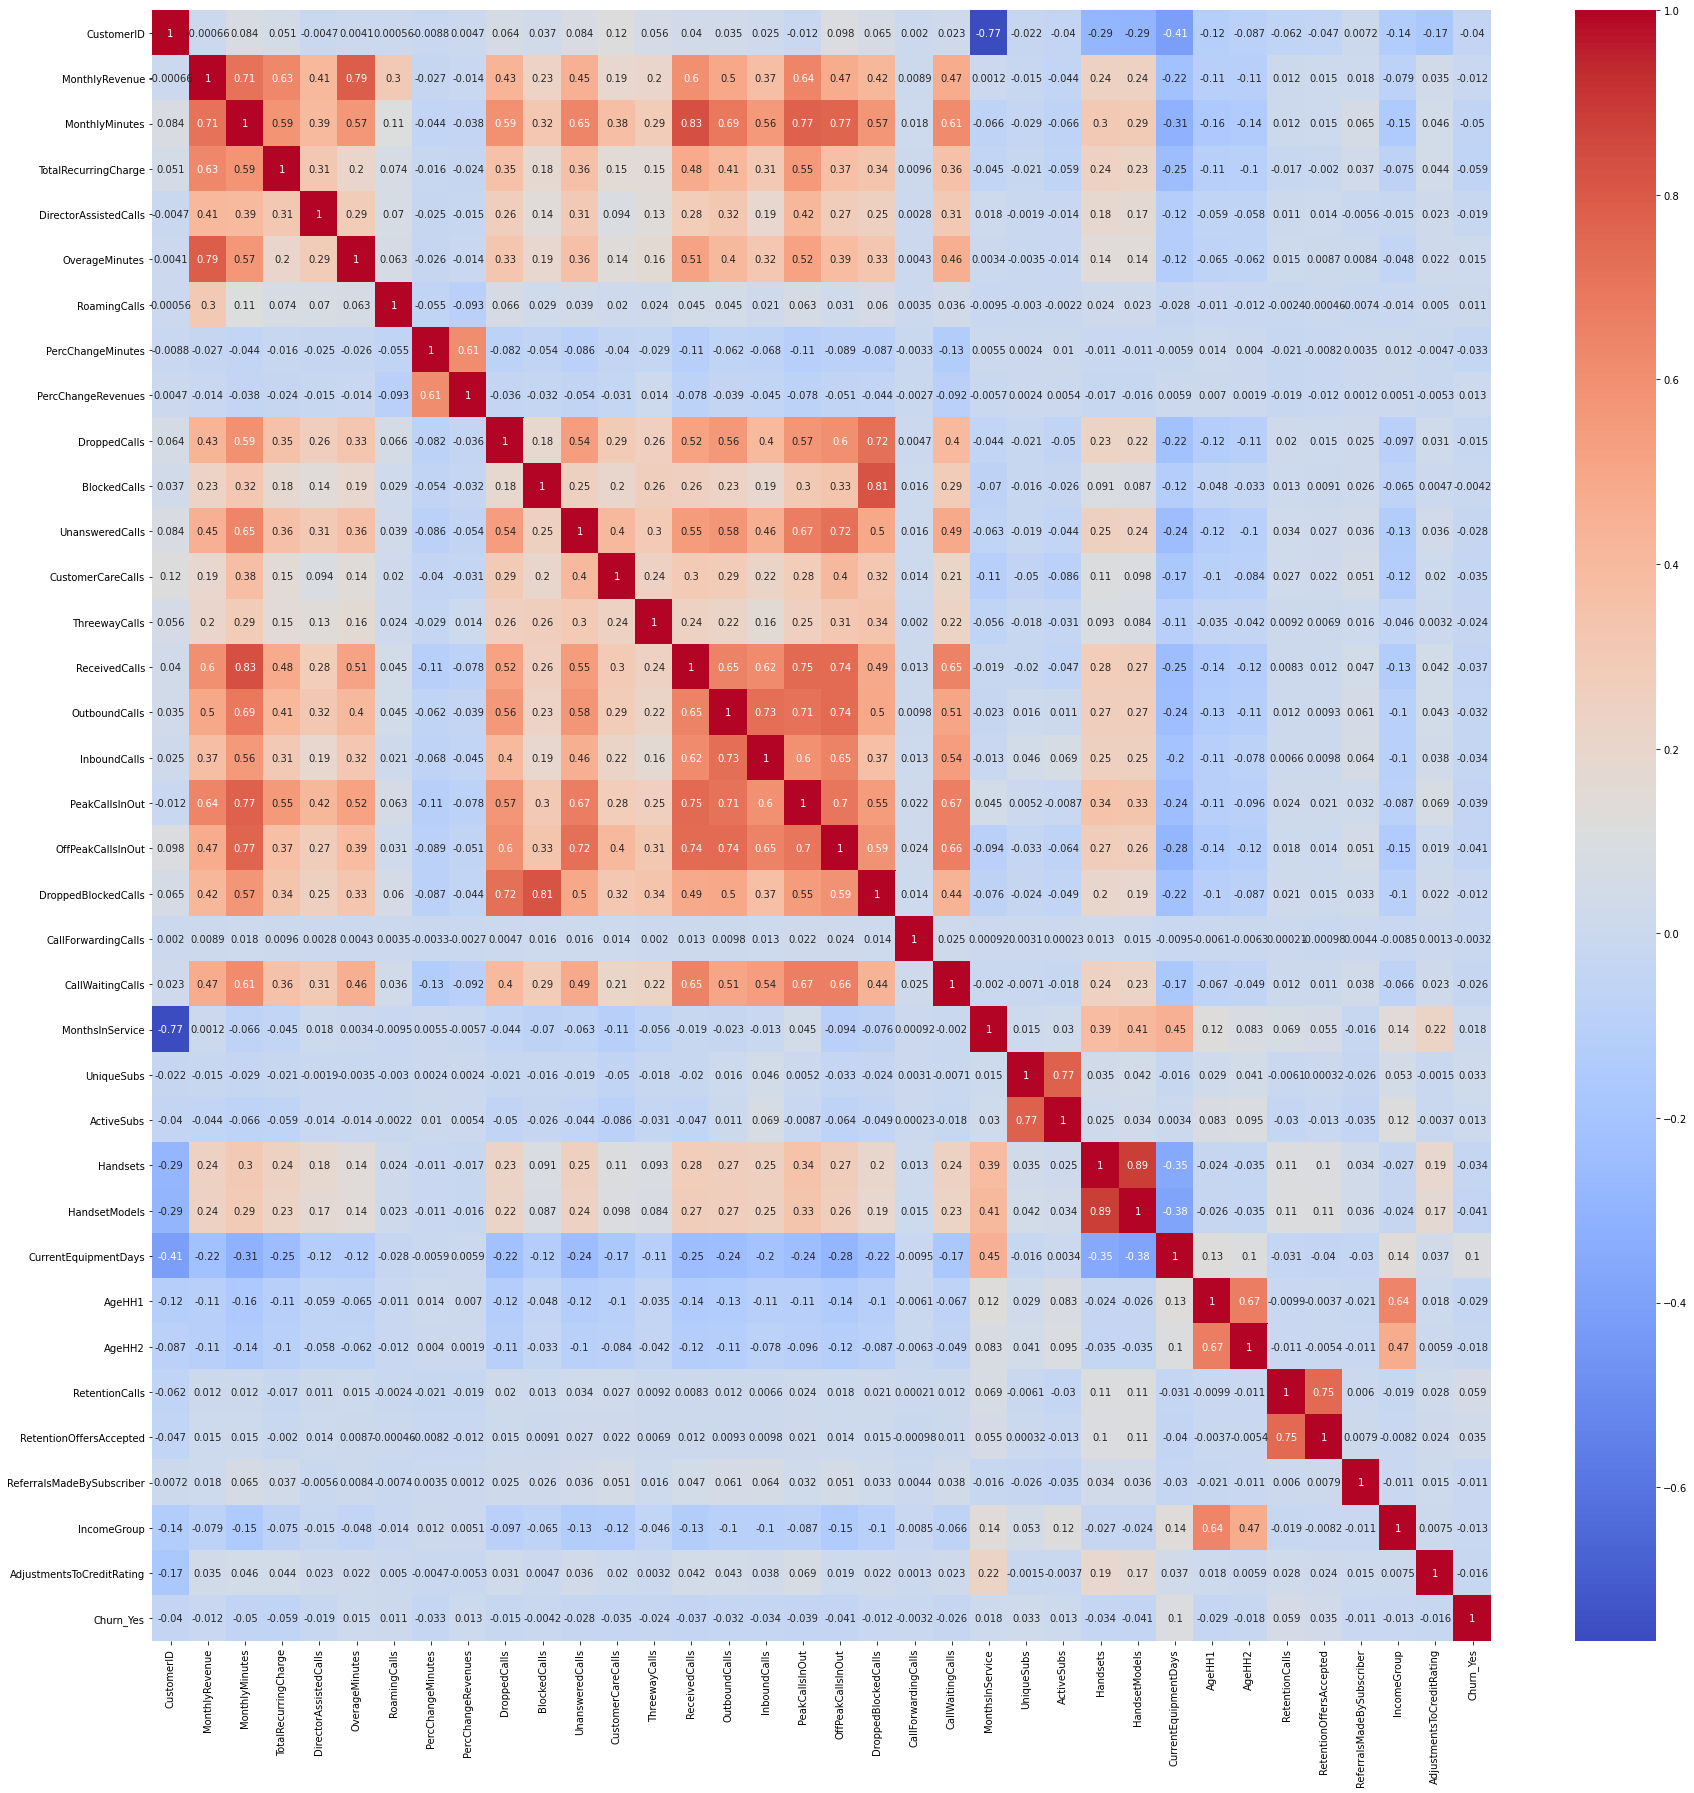

In [110]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dummied_churn.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [97]:
dummied_churn.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcy

In [98]:
['CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
 'PercChangeMinutes', 'UniqueSubs', 'CustomerCareCalls', 'PeakCallsInOut',
 'ReceivedCalls', 'TotalRecurringCharge', 'MonthlyMinutes', 'NewCellphoneUser', 'MadeCallToRetentionTeam']

['CurrentEquipmentDays',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'PercChangeMinutes',
 'UniqueSubs',
 'CustomerCareCalls',
 'PeakCallsInOut',
 'ReceivedCalls',
 'TotalRecurringCharge',
 'MonthlyMinutes',
 'NewCellphoneUser',
 'MadeCallToRetentionTeam']

Perform the following preprocessing steps:

- This dataset has many columns; identify a subset of 10-15 features that you think could affect a customer's propensity to churn (also called "customer loss" or "customer attrition"). Include at least 1 categorical variable.
- Drop all rows that containing any missing values (this should be a fairly small number of rows)
- Convert the response from a string to a binary 1-0 encoding.

In [99]:
# answer goes here
telecom = dummied_churn[['CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
 'PercChangeMinutes', 'UniqueSubs', 'CustomerCareCalls', 'PeakCallsInOut',
 'ReceivedCalls', 'TotalRecurringCharge', 'MonthlyMinutes', 'NewCellphoneUser', 'MadeCallToRetentionTeam', 'Churn_Yes']]

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49776 entries, 0 to 51043
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CurrentEquipmentDays     49776 non-null  float64
 1   RetentionCalls           49776 non-null  int64  
 2   RetentionOffersAccepted  49776 non-null  int64  
 3   PercChangeMinutes        49776 non-null  float64
 4   UniqueSubs               49776 non-null  int64  
 5   CustomerCareCalls        49776 non-null  float64
 6   PeakCallsInOut           49776 non-null  float64
 7   ReceivedCalls            49776 non-null  float64
 8   TotalRecurringCharge     49776 non-null  float64
 9   MonthlyMinutes           49776 non-null  float64
 10  NewCellphoneUser         49776 non-null  object 
 11  MadeCallToRetentionTeam  49776 non-null  object 
 12  Churn_Yes                49776 non-null  uint8  
dtypes: float64(7), int64(3), object(2), uint8(1)
memory usage: 5.0+ MB


Although some implementations of tree-based models support categorical variables directly, scikit-learn's implementation does not, so we will need to convert our categorical variable(s) into numbers. In linear regression, we used one-hot/dummy encoding, but this has drawbacks that can be particularly problematic in the context of trees. Namely, dummy encoding can lead to very sparse columns when dealing with high-dimensional categorical features; the tree treats these levels as indepedent features is very unlikely to make a split on any of the individual levels, since the corresponding columns consist almost entirely consist of a single value.

Ideally, we would consider all of the levels simultaneously, which trees can do efficiently. However, sklearn does not implement this efficient algorithm for splitting on categorical variables. In this situation, a better alternative to dummy encoding is leave-one-out-encoding. This transforms each categorical into its conditional probability of the positive class, excluding the observation itself to avoid potential data leakage. Perform the following steps:

- Create an 80-20 train/test split on the data
- Fit a leave-one-out encoder to the training data and encode the categorical variables in the training data. The category_encoders package is helpful for this task. (Note that this ordering is important; if we fitted the encoder to the full dataset before making the train/test split, we would introduce data leakage by allowing the test data to affecting the estimates of the category-conditional probabilities.)

In [100]:
!pip install category_encoders

In [101]:
# answer goes here
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import train_test_split

y = telecom['Churn_Yes']

X = telecom.drop(columns='Churn_Yes')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [102]:
ce = LeaveOneOutEncoder()

ce.fit(X_train, y_train)

LeaveOneOutEncoder(cols=['NewCellphoneUser', 'MadeCallToRetentionTeam'],
                   drop_invariant=False, handle_missing='value',
                   handle_unknown='value', random_state=None, return_df=True,
                   sigma=None, verbose=0)

In [103]:
X_train_ce = ce.transform(X_train)
X_test_ce = ce.transform(X_test)

Next, fit the random forest model. You can tinker with or tune the parameters if you like, although we will use the default parameter values.

In [104]:
# answer goes here
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() 

rf.fit(X_train_ce, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

To evaluate our model, produce the predicted values for the test sample. Remember to apply our previously fitted encoder to the test data prior to making predictions.

In [105]:
# answer goes here
y_pred = rf.predict(X_test_ce)

After making the predictions, print out the classification report (sklearn.metrics.classification_report). In addition, plot the confusion matrix and ROC curve. How did our model perform?

In [106]:
# answer goes here
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      8941
           1       0.48      0.12      0.19      3503

    accuracy                           0.72     12444
   macro avg       0.61      0.53      0.51     12444
weighted avg       0.66      0.72      0.65     12444



In [107]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8500,  441],
       [3090,  413]])

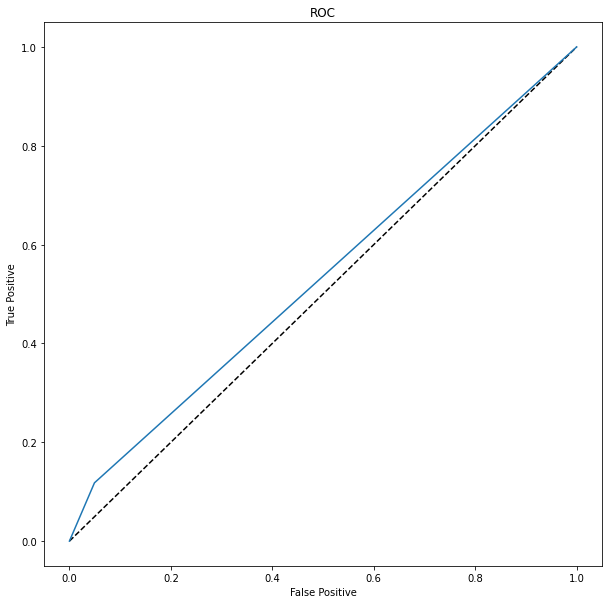

In [108]:
# answer goes here
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
fig = plt.figure(figsize = (10, 10)) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr) 
plt.xlabel('False Positive') 
plt.ylabel('True Positive') 
plt.title('ROC') 
plt.show()


Print the feature importances, ordered by importance from high to low. What is the default sklearn feature importance metric?

In [109]:
forest_importance = pd.Series(rf.feature_importances_, index=X_train_ce.columns).sort_values(ascending=False)
forest_importance

CurrentEquipmentDays       0.183236
PercChangeMinutes          0.164319
MonthlyMinutes             0.162513
PeakCallsInOut             0.139830
ReceivedCalls              0.137705
TotalRecurringCharge       0.094217
CustomerCareCalls          0.060153
UniqueSubs                 0.033691
NewCellphoneUser           0.016115
RetentionCalls             0.003362
MadeCallToRetentionTeam    0.003196
RetentionOffersAccepted    0.001663
dtype: float64